# Analyze  challenge for Samvarta Internship

## We will load a .csv file, clean it and then process some numbers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Upload test data.**   
Please download the the csv file from :    https://samvarta.org/testdata.csv   
Then run the cell below.   
You have a few seconds to select the file to upload, otherwise the cell will end on its own. Just re-run the cell if that happens.


In [2]:
from google.colab import files
files.upload()

Saving testdata.csv to testdata (3).csv


{'testdata.csv': b'\xef\xbb\xbf1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19\r\n1,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,15,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,7 MONTH,,,\r\n2,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,22,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,5 MONTHS,,,\r\n3,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,20,F,12345678,,9999999999,29-04-2020,Prayagraj,YES,,,,,\r\n4,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21,M,12345678,,9999999999,29-04-2020,Prayagraj,YES,,,,,\r\n5,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21,M,12345678,,9999999999,29-04-2020,Prayagraj,YES,,,,,\r\n6,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,24,F,12345678,,9999999999,29-04-2020,Prayagraj,YES,,,,,\r\n7,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,18,F,12345678,,9999999999,29-04-2020,Prayagraj,YES,,,,,\r\n8,BASTI SADAR

**Read csv file into pandas and look at some values**

In [3]:
# Define column names by hand for easier clean up and better readability.
columnnames=['SerialNumber', 'Tehsil', 'Block',
                        'Village', 'FullName', 'FathersFullName',
                        'Age', 'Sex', 'PhoneNumber',
                        'IDProof', 'IDNumber', 'ArrivalDate',
                        'SourceCity', 'SourceCheckup', 'Skill', 'YrsExp',
                        'OtherSkills', 'CompanyName', 'Comments']

# use pd.read_csv to read the csv. Skip the first row, and use the column names above
rawdata = pd.read_csv("testdata.csv",names=columnnames,skiprows=True)

### look at the dataframe using .head()
rawdata.head(7)

,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments
0,1,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,15.0,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,7 MONTH,NaN,NaN,NaN
1,2,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,22.0,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,5 MONTHS,NaN,NaN,NaN
2,3,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
3,4,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
4,5,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
5,6,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,24.0,F,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
6,7,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,18.0,F,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN


**Check for missing values**

In [4]:
#missing values
print(rawdata.isna().sum())

SerialNumber         0
Tehsil               0
Block                0
Village              0
FullName             0
FathersFullName      0
Age                  3
Sex                  1
PhoneNumber          0
IDProof             30
IDNumber             0
ArrivalDate          0
SourceCity           4
SourceCheckup       10
Skill               65
YrsExp              95
OtherSkills        604
CompanyName        591
Comments           710
dtype: int64


### **Analyze gender (and clean it)**   


In [5]:
### Print all unique values in the sex column
print("\nCurrent Unique values in Sex (and counts):")
print("\nVariations of entered gender data: ",rawdata.Sex.unique())
print("-----------------------")
print("Counts: \n",rawdata.Sex.value_counts())
print("-----------------------")

#One data point with missing sex value
print("\nData point with missing gender info:",rawdata[rawdata.Sex.isna()])


Current Unique values in Sex (and counts):

Variations of entered gender data:  ['MALE' 'F' 'M' 'FEMALE' 'पु0' 'म0' 'ड' nan 'म']
-----------------------
Counts: 
 M         526
पु0        80
MALE       56
F          40
म0          2
FEMALE      2
ड           2
म           1
Name: Sex, dtype: int64
-----------------------

Data point with missing gender info:      SerialNumber       Tehsil       Block  ... OtherSkills CompanyName Comments
647            72  BASTI SADAR  BAHADURPUR  ...         NaN         NaN      NaN

[1 rows x 19 columns]


**Replace the bad data**   

*   Replace inconsistent values in Sex using the following table
  *   "MALE", "पु0" -> "M"
  * "FEMALE", "म0", "म" -> "F"


*   Replace invalid values, nans or Unknown values with Unknown -> U
  * nan -> "U"
  * "ड" -> "U"

In [6]:
ds = rawdata.copy() # Make changes in a new dataframe

# Replace inconsistent values in Sex using the following table
# "MALE", "पु0" -> "M"
# "FEMALE", "म0","म" -> "F"
ds['Sex'].replace(["MALE","पु0"],"M",inplace=True)
ds['Sex'].replace(["FEMALE","म0","म"],"F",inplace=True)

# # Replace invalid values, nans or Unknown values with Unknown -> U
# nan -> "U"
# "ड" -> "U"
ds['Sex'].fillna("U",inplace=True)
ds['Sex'].replace("ड","U",inplace=True)

print("Updated unique values in Sex:")
print("\nCleaned Gender list: ",ds.Sex.unique())
print("\nCounts of M & F: \n",ds.Sex.value_counts())

Updated unique values in Sex:

Cleaned Gender list:  ['M' 'F' 'U']

Counts of M & F: 
 M    662
F     45
U      3
Name: Sex, dtype: int64


**Plotting the distribution of genders.**

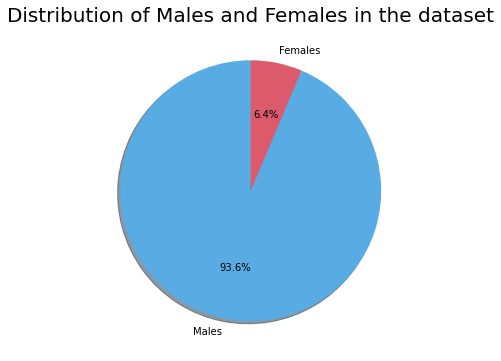

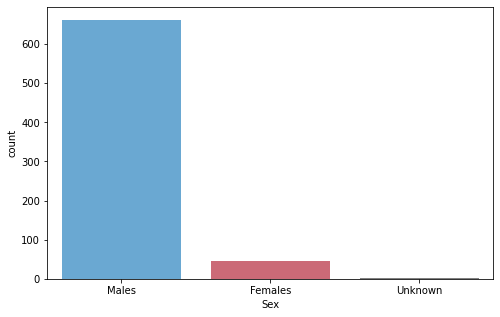

In [7]:
#Plot distribution of Males and Females, Ignoring Unknowns as they are only three
males = len(ds[ds['Sex'] == "M"])
females = len(ds[ds['Sex'] == "F"])
unknown = len(ds[ds['Sex'] == "U"])
plt.pie(x=[males, females], explode=(0, 0), labels=[ 'Males', 'Females'],
        autopct='%1.1f%%', shadow=True, startangle=90, colors = ['#59ABE3','#DB5A6B'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Distribution of Males and Females in the dataset', fontsize = 20, fontweight=30)
plt.show()

#Distribtion
descending_order = ds['Sex'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(8,5))
count = sns.countplot(data=ds,x='Sex',order=descending_order,palette=['#59ABE3','#DB5A6B',"#808080"])
count.set_xticklabels(["Males","Females","Unknown"])
plt.show()

**Step 7: Lets look at data and see what else can we fix**

In [8]:
### Randomly sample rows from the data
ds.sample(7)

,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments
509,65,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,35.0,M,12345678,AADHAR,9999999999,12-05-2020,fnYyh,gka,cSVjh odZ,"5o""kZ",NaN,NaN,NaN
0,1,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,15.0,M,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,7 MONTH,NaN,NaN,NaN
95,96,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,24.0,M,12345678,AADHAR,9999999999,06-05-2020,BALLABHGARH,YES,PLATING LINE,04 MONTHS,NaN,NaN,NaN
709,134,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,27.0,M,12345678,AADHAR,9999999999,11-05-2020,DELHI,YES,MAJDURI,3,NaN,NaN,NaN
19,20,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,22.0,M,12345678,AADHAR,9999999999,06-05-2020,GUJRAT,YES,OPERATOR ROBOT,2 YEARS,NaN,NaN,NaN
555,111,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,26.0,M,12345678,AADHAR,9999999999,12-05-2020,MUMBAI,YES,MAJDURI,1,NaN,NaN,NaN
414,415,BASTI SADAR,बहादुरपुर,Deidentified,Deidentified,Deidentified,32.0,M,12345678,vk/kkj,9999999999,11@05@2020,बसई,हां,कारपेन्टर,5 वर्ष,NaN,NaN,NaN


**Step 8: Change all Block names to Bahadurpur**   
Looks like they can contain different spellings or variations. Just fix all to the same value.

In [9]:
print("\nIncosistent Blocks list: \n",ds.Block.unique())
print("-------------------------")
print("Counts: \n",ds.Block.value_counts())
print("-------------------------")


Incosistent Blocks list: 
 ['BAHADUR PUR' 'Bahadur pur' 'Bahadur Pur' 'BAHADURPUR' 'Bahdhur'
 'BAHDURPR' 'BAHDURPUR' 'Bhadhur' 'BHADHUR' 'Bhadhur pur' 'BHADHUR PUR'
 'Bhadhurpur' 'BHADHURPUR' 'BHADURPUR' 'बहादुरपुर']
-------------------------
Counts: 
 BAHADURPUR     447
बहादुरपुर       80
BHADHUR PUR     69
BAHADUR PUR     61
BHADHUR         11
BHADHURPUR       9
BHADURPUR        7
Bhadhur pur      6
Bahadur pur      5
Bhadhurpur       4
Bahadur Pur      3
BAHDURPR         3
BAHDURPUR        2
Bahdhur          2
Bhadhur          1
Name: Block, dtype: int64
-------------------------


In [10]:
# Replace inconsistent values in Block to one standard value: BAHADURPUR
# There are no missing values in in Block

ds['Block'].replace(["बहादुरपुर", "BHADHUR PUR", "BAHADUR PUR",
                    "BHADHUR","BHADHURPUR", "BHADHURPUR", 
                    "BHADURPUR", "Bhadhur pur","Bahadur pur",
                    "Bhadhurpur", "Bahadur Pur", "BAHDURPR",
                    "BAHDURPUR", "Bahdhur", "Bhadhur"],
                    "BAHADURPUR",inplace=True)

### Fill code to show values and counts
print("Cleaned up the Block:")
print("\nBlock names after cleaning: \n",ds.Block.value_counts())

Cleaned up the Block:

Block names after cleaning: 
 BAHADURPUR    710
Name: Block, dtype: int64


**Let's look at possible city names**

In [11]:
### Fill code here to print all city names
print("City names before cleaning:")

for city in ds.SourceCity.unique():
    print(city,end="\t")

City names before cleaning:
MUMBAI	Prayagraj	DELHI	INDORE	FARIDABAD	HYDRABAD	GUJRAT	MADHYA PRADESH	ANDHRA PRADESH	GURGAON	AHAMADABAD	KANPUR	ALIGARH	GONDA	nan	AMRITSAR	RAJASTHAN	BOMBAY	BALLABHGARH	NOIDA	AHEMADABAD	NAGPUR	MATHURA	AHAMDABAD	BHIMANDI	THANE	PUNE	SURAT	HAPUR	SAHARANPUR	HARYANA	BHIWNDI	AHMEDABAD	TELANGANA	HARIYANA	BHIWANDI	JALGAUV	RAJSTHAN	MAHARASTRA	KERALA	BRODARA	BANGOLORE	KERLA	MHARSATRA	LUCKNOW	GUDGAWA	NAGH PUR	MHARASTRA	AMDABAD	BANGLOR	JHASI	PUNA	SAHARAN PUR	HARAYAN	CHNADI GHAR	GAZIYABAD	NASIK	VASAI MUMBAI	BEGLORE	ULWAY MUMBAI	मुम्बई	मुम्बई भिवडी	सूरत	हैदराबाद	तेलंगाना	लुधियाना	हापुड	मुम्बई मानखुर्द एकतानगर	गुजरात गोधरा	थाने	वसई	बसई	अन्धेरी बेस्ट	पुणे	गुजरात	केरल	MUMBAI CST	AHAMADNAGAR	BELAUR	NIGOJ	MMBAI	MAHARSHTRA	fnYyh	Fkkus	eqEcbZ	POONA	MUMABAI	HENFRABAD	HAIDRABAD	BANGLORE	RAJESTHA	SOLAPUR	AGRA	JAMMU	GUJRAAT	BEGOLOR	AGARA	AHMADABAD	कानपुर	अहमदाबाद	

#Challenge 1: Fix city names


Look up table here (file: cityreplacement.csv):
https://drive.google.com/file/d/1CTlnwK-wfmqMrQ0g6K5dbDQ_-IhpGCLm/view?usp=sharing

In [12]:
#Upload cityreplacement.csv
from google.colab import files
files.upload()

{}

In [13]:
replacements = pd.read_csv("cityreplacements.csv")
replacements.tail(7)

,Current Value,New Value
93,JAMMU,Jammu
94,GUJRAAT,Gujarat
95,BEGOLOR,Bangalore
96,AGARA,Agra
97,AHMADABAD,Ahmedabad
98,______,Kanpur
99,________,Ahmedabad


In [14]:
for i in list(range(60,76)):
  print(replacements.iloc[i])
for i in list(range(98,100)):
  print(replacements.iloc[i])

#Adding the hindi values into the lookup table: replacements
replacements.iloc[60,0] = "मुम्बई"
replacements.iloc[61,0] = "मुम्बई भिवडी"
replacements.iloc[62,0] = "सूरत"
replacements.iloc[63,0] = "हैदराबाद"
replacements.iloc[64,0] = "तेलंगाना"
replacements.iloc[65,0] = "लुधियाना"
replacements.iloc[66,0] = "हापुड"
replacements.iloc[67,0] = "मुम्बई मानखुर्द एकतानगर"
replacements.iloc[68,0] = "गुजरात गोधरा"
replacements.iloc[69,0] = "थाने"
replacements.iloc[70,0] = "वसई"
replacements.iloc[71,0] = "बसई"
replacements.iloc[72,0] = "अन्धेरी बेस्ट"
replacements.iloc[73,0] = "पुणे"
replacements.iloc[74,0] = "गुजरात"
replacements.iloc[75,0] = "केरल"
replacements.iloc[98,0] = "कानपुर"
replacements.iloc[99,0] = "अहमदाबाद"

for i in list(range(60,76)):
  print(replacements.iloc[i])
for i in list(range(98,100)):
  print(replacements.iloc[i])

Current Value    ______
New Value        Mumbai
Name: 60, dtype: object
Current Value    ______ _____
New Value            Bhiwandi
Name: 61, dtype: object
Current Value     ____
New Value        Surat
Name: 62, dtype: object
Current Value     ________
New Value        Hyderabad
Name: 63, dtype: object
Current Value     ________
New Value        Telangana
Name: 64, dtype: object
Current Value    ________
New Value        Ludhiana
Name: 65, dtype: object
Current Value    _____
New Value        Hapur
Name: 66, dtype: object
Current Value    ______ ________ _______
New Value            Ekta Nagar Mankhurd
Name: 67, dtype: object
Current Value    ______ _____
New Value              Godhra
Name: 68, dtype: object
Current Value     ____
New Value        Thane
Name: 69, dtype: object
Current Value      ___
New Value        Vasai
Name: 70, dtype: object
Current Value      ___
New Value        Vasai
Name: 71, dtype: object
Current Value    _______ _____
New Value              Andheri
Name: 72, 

In [15]:
#Left Join on ds and replacements to add New Value to dataframe.
ds_city = pd.merge(ds, replacements, how='left',
        left_on='SourceCity', right_on='Current Value')

ds_city['SourceCity'].fillna("Unknown",inplace=True)
#Replace SourceCity with corresponding New Values and delete the unnecessary columns.
ds_city['SourceCity'] = ds_city['New Value']
ds_city.drop(['Current Value', 'New Value'], axis=1, inplace=True)

#Cleaned up SourceCity Entires
ds_city["SourceCity"].value_counts()

Mumbai                 329
Gujarat                 45
Delhi                   37
Ahmedabad               29
Bhiwandi                24
Prayagraj               22
Ballabhgarh             16
Rajasthan               14
Kerala                  13
Maharashtra             13
Haryana                 12
Pune                    12
Hyderabad               12
unknown                 12
Agra                    10
Bangalore               10
Surat                    9
Telangana                9
Kanpur                   8
Vasai                    7
Nagpur                   6
Solapur                  4
Saharanpur               4
Thane                    4
Faridabad                4
Gurugram                 4
Andhra Pradesh           4
Ludhiana                 4
Gonda                    4
Madhya Pradesh           3
Amritsar                 2
Aligarh                  2
Hapur                    2
Ekta Nagar Mankhurd      2
Nashik                   2
Jhansi                   2
Baroda                   1
M

#Challenge 2: Fix the YrsExp Values

**List the unique values**


In [16]:
for i in ds_city.YrsExp.unique():
  print(i,end="\t")

7 MONTH	5 MONTHS	nan	2 YEARS	1 YEAR	6 MONTHS	3 YEARS	2 MONTHS	5 YEAR	7 MONTHS	3 YEAR	2 YEAR	6 YEARS	7 YEARS	4 MONTHS	4	6	7	2	8	15	5	10 YEAR	8 year	25 YEARS	3	1	1YEAR	5 YEARS	1 YERS	06 MONTHS	05 YEARS	03 YEARS	04 MONTHS	02 YEARS	03 MONTHS	02 MONTHS	01 YEARS	4 YEARS	10	13	3YEAR	6YRS.	5YRS.	4YRS.	7YRS.	10YRS.	9YRS.	3 MOTH	5 MONTH	20	6 YEAR	33	18	11	4 YEAR	6 Month	2 MONTH	15 YEAR	25	40	19	27	7 YEAR	17 YEAR	8 YEAR	9 YEAR	15 YEARS	3 MONTH	11 MONTHS	6 MONTH	11 YEARS	10 YEARS	12 YEARS	8 MONTH	9	30	12	4 MONTH	5 YERS	3साल	10साल	1साल	7साल	5साल	3 माह	2 माह	3 साल	2 साल	4साल	2साल	18साल	30साल	11साल	40साल	12साल	6माह	3माह	13साल	8साल	3 वर्ष	10 वर्ष	8 माह	7 वर्ष	9वर्श	3 बर्ष	5 वर्ष	5 माह	8 वर्ष	4 वर्ष	2 वर्ष	1 वर्ष	6 माह	4माह	5 साल	25 साल	9 साल	5माह	6साल	4Y	20 YEARS	40 YEAR	5Y	12 YEAR	2MONTHS	9o"kZ	5o"kZ	3o"kZ	20o"kZ	25o"kZ	6MONTH	10YEARS	2YRS.	2 YRS.	2YRS	1YRS	8YRS	2YEAR	3YEAT	5 YS	8 MONTHS	4 YS	6 MTH	15 YS	22	14	30YEAR	28	12 साल	1 साल	15 साल	20 साल	10 साल	4 साल	

* Replacing missing values with 0

In [17]:
#Missing values in YrsExp
print("Missing values: ",ds_city.YrsExp.isna().sum())

ds_exp = ds_city.copy()
#Filling missing values to Unknown
ds_exp["YrsExp"].fillna(0,inplace=True)
print("Updated: ",ds_exp.YrsExp.isna().sum())

Missing values:  95
Updated:  0


* Replacing months by 0.
* Replacing years by the number of years.
* Replacing 9o"kZ...etc., by number assuming they are typos.

In [18]:
# (\d+\s?[Mm]\w+) to capture months like: 06 MONTHS,3 MOTH, 5 MONTH, 6MONTH, 6 MTH...
# Replace with 0
ds_exp['YrsExp'].replace(to_replace =r'(\d+\s?[Mm]\w+)', value = 0, 
                            regex = True, inplace=True) 

# (\d+\s?माह)  to capture hindi months like: 2 माह,  6 माह...
ds_exp['YrsExp'].replace(to_replace =r'(\d+\s?माह)', value = 0, 
                            regex = True, inplace=True) 


# (\d+)\s?[Yy]\w*.? to capture years like: 2 YEARS, 5 YEAR, 8 year, 7YRS., 1 YERS, 4 YS, 3 YEAT...
#Replace with the number in the matched string
ds_exp['YrsExp'].replace(to_replace =r'(\d+)\s?[Yy]\w*.?', value = r'\1', 
                            regex = True, inplace=True) 


# (\d+)\s?साल to capture years like: 11साल, 2 साल...
#Replace with the number in the matched string
ds_exp['YrsExp'].replace(to_replace =r'(\d+)\s?साल', value = r'\1', 
                            regex = True, inplace=True) 

# (\d+)\s?[वब].* to capture years like: 7 वर्ष, 9वर्श, 3 बर्ष...
#Replace with the number in the matched string
ds_exp['YrsExp'].replace(to_replace =r'(\d+)\s?[वब].*', value = r'\1', 
                            regex = True, inplace=True) 

# (\d+)o"kZ to capture bad values like: 9o"kZ, 20o"kZ...
# Replace with the number, assuming the entries are years.
ds_exp['YrsExp'].replace(to_replace =r'(\d+)o"kZ', value = r'\1', 
                            regex = True, inplace=True) 

#Cleaned up YrsExp Column
for i in ds_exp.YrsExp.unique():
  print(i,end="\t")

0	2	1	3	5	6	7	4	8	15	10	25	05	03	02	01	13	9	20	33	18	11	40	19	27	17	12	30	22	14	28	

* Replacing values greater than 10 with 10

In [19]:
ds_exp['YrsExp'] = ds_exp['YrsExp'].astype(int)
print("YrsExp data type changed to: ",ds_exp.YrsExp.dtype)

ds_exp.loc[ds_exp['YrsExp'] > 10, 'YrsExp'] = 10

#New range of cleaned years of experience
for i in ds_exp.YrsExp.unique():
  print(i,end="\t")

YrsExp data type changed to:  int64
0	2	1	3	5	6	7	4	8	10	9	

# Challenge 3: Fuzzy Matching
**Clean the city names list using fuzzy string matching.**
**Fuzzy string matching calculates string similarity.**

Some examples:   

String 1|String2|Match Score
:-:|:-:|:-:
Mumbai | Mumabai | 92%
Mumbai | Vasai Mumbai | 66%
Mumbai | Bangalore | 13%
Bagalore | Bangalore | 94%

Comparing SourceCity and the second column in the lookup table, Matching those with a score higher than 60%, and replacing them.

In [20]:
#Installing and importing the fuzzywuzzy package
!pip install fuzzywuzzy

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [21]:
#Replace using domain knowledge that Vasai is in Mumbai
ds_exp.loc[ds_city['SourceCity'] == 'Vasai','SourceCity'] = "Vasai Mumbai"

for city in ds_exp['SourceCity'].unique():
  for token in replacements["New Value"].unique():
    score=fuzz.ratio(city,token)
    if(score>=60and score<100):
      print('Score: {} | {} == {}'.format(score,city,token))

Score: 71 | Mumbai == Ulwe Mumbai
Score: 67 | Faridabad == Ghaziabad
Score: 67 | Gujarat == Surat
Score: 79 | Madhya Pradesh == Andhra Pradesh
Score: 64 | Madhya Pradesh == Maharashtra
Score: 79 | Andhra Pradesh == Madhya Pradesh
Score: 67 | Kanpur == Nagpur
Score: 73 | Kanpur == Hapur
Score: 62 | Kanpur == Saharanpur
Score: 62 | Kanpur == Solapur
Score: 60 | Gonda == Noida
Score: 73 | Gonda == Godhra
Score: 71 | unknown == Lucknow
Score: 60 | Noida == Gonda
Score: 67 | Nagpur == Kanpur
Score: 73 | Nagpur == Hapur
Score: 62 | Nagpur == Solapur
Score: 67 | Surat == Gujarat
Score: 73 | Hapur == Kanpur
Score: 73 | Hapur == Nagpur
Score: 67 | Hapur == Solapur
Score: 62 | Saharanpur == Kanpur
Score: 64 | Maharashtra == Madhya Pradesh
Score: 71 | Lucknow == unknown
Score: 67 | Ghaziabad == Faridabad
Score: 67 | Vasai Mumbai == Mumbai
Score: 61 | Vasai Mumbai == Ulwe Mumbai
Score: 71 | Ulwe Mumbai == Mumbai
Score: 73 | Godhra == Gonda
Score: 62 | Belaur == Solapur
Score: 62 | Solapur == Kanpu

**We have some good matching fuzz ratio scores for:**

Score |City|Token
:-:|:-:|:-:
79 | Andhra Pradesh | Madhya Pradesh
71 | Ulwe Mumbai | Mumbai
73 | Godhra | Gonda
71 | Vasai Mumbai | Ulwe Mumbai
71 | Lucknow | Unknown
73 | Vasai Mumbai | Mumbai
73 | Hapur | Kanpur
...etc.,

>However, With some common sense(Lucknow!=Unknown) and knowledge of basic geography we can exclude most similarly matched cities excluding Ulwe Mumbai and Vasai Mumbai

In [22]:
#Replacing Vasai Mumbai and Ulwe Mumbai with Mumbai
ds_exp.loc[ds_city['SourceCity'] == 'Ulwe Mumbai','SourceCity'] = "Mumbai"
ds_exp.loc[ds_city['SourceCity'] == 'Vasai Mumbai','SourceCity'] = "Mumbai"
ds_exp['SourceCity'].unique()

array(['Mumbai', 'Prayagraj', 'Delhi', 'Indore', 'Faridabad', 'Hyderabad',
       'Gujarat', 'Madhya Pradesh', 'Andhra Pradesh', 'Gurugram',
       'Ahmedabad', 'Kanpur', 'Aligarh', 'Gonda', 'unknown', 'Amritsar',
       'Rajasthan', 'Ballabhgarh', 'Noida', 'Nagpur', 'Mathura',
       'Bhiwandi', 'Thane', 'Pune', 'Surat', 'Hapur', 'Saharanpur',
       'Haryana', 'Telangana', 'Jalgaon', 'Maharashtra', 'Kerala',
       'Baroda', 'Bangalore', 'Lucknow', 'Jhansi', 'Chandigarh',
       'Ghaziabad', 'Nashik', 'Vasai Mumbai', 'Ludhiana',
       'Ekta Nagar Mankhurd', 'Godhra', 'Andheri', 'Belaur', 'Nighoj',
       'Solapur', 'Agra', 'Jammu'], dtype=object)

#### **Clean** up IDProof

In [23]:
print("Before Cleaning IDProof: ",ds_exp.IDProof.unique())
  
ds_id = ds_exp.copy()
ds_id['IDProof'].replace(["ADHAR","AADHAR","AADHARE","ADDHAR","AAHAR"],"Aadhaar",inplace=True)
ds_id['IDProof'].fillna("Unavailable",inplace=True)
ds_id['IDProof'].replace(["OTER ID","VOTER ID"],"Voter Id",inplace=True)
ds_id['IDProof'].replace("PAN CARD","PAN Card",inplace=True)
print("---------------------")
print("After Cleaning IDProof: ",ds_id.IDProof.unique())

Before Cleaning IDProof:  ['ADHAR' nan 'AADHAR' 'VOTER ID' 'AADHARE' 'ADDHAR' 'OTER ID' 'vk/kkj'
 'PAN CARD' 'AAHAR']
---------------------
After Cleaning IDProof:  ['Aadhaar' 'Unavailable' 'Voter Id' 'vk/kkj' 'PAN Card']


In [24]:
print("Before Cleaning SourceCheckup: ",ds_id.SourceCheckup.unique())

ds_id['SourceCheckup'].replace(['हाॅ', 'हां', 'Yes', 'YES'],"Y",inplace=True)
ds_id['SourceCheckup'].fillna("Unknown",inplace=True)
ds_id['SourceCheckup'].replace(['gka','-'],"Unknown",inplace=True)

print("---------------------")
print("After Cleaning IDProof: ",ds_id.SourceCheckup.unique())

Before Cleaning SourceCheckup:  ['YES' '-' 'Yes' nan 'हाॅ' 'हां' 'gka']
---------------------
After Cleaning IDProof:  ['Y' 'Unknown']


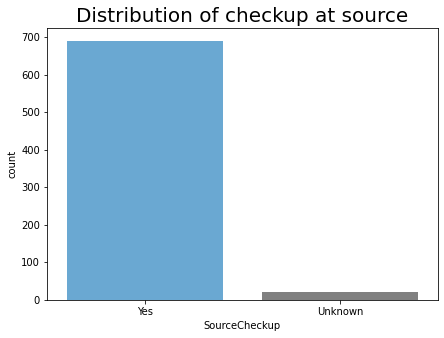

In [25]:
descending_order = ds_id['SourceCheckup'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(7,5))
count = sns.countplot(data=ds_id,x='SourceCheckup',order=descending_order,palette = ['#59ABE3',"#808080"])
count.set_xticklabels(["Yes","Unknown"])
plt.title('Distribution of checkup at source', fontsize = 20, fontweight=30)
plt.show()

### Clean up
##### We Observe that Fullname, FathersFullName, Village have values removed to protect privacy of the migrants
##### Removing Fullname, FathersFullName, Village columns as they are not useful in Analysis. Aslo, Remove Comments as the whole column is missing

In [26]:
print(ds_id.Village.unique())
print(ds_id.Comments.unique())

ds_id.drop(['Village','FullName','FathersFullName','Comments'],axis=1,inplace=True)

ds_id['Skill'].fillna("Unknown",inplace=True)
ds_id['OtherSkills'].fillna("Unknown",inplace=True)
ds_id['CompanyName'].fillna("Unknown",inplace=True)

ds_id.sample(7)

['Deidentified']
[nan]


,SerialNumber,Tehsil,Block,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName
526,82,BASTI SADAR,BAHADURPUR,20.0,M,12345678,Aadhaar,9999999999,05-12-2020,Hyderabad,Y,SOFA WORK,3,Unknown,Unknown
501,57,BASTI SADAR,BAHADURPUR,20.0,M,12345678,Aadhaar,9999999999,13/5/2020,Mumbai,Y,LAROURER,1,Unknown,Unknown
453,9,BASTI SADAR,BAHADURPUR,30.0,F,12345678,Aadhaar,9999999999,12-05-2020,Mumbai,Y,HOUSE WIFE,0,Unknown,Unknown
554,110,BASTI SADAR,BAHADURPUR,30.0,M,12345678,Aadhaar,9999999999,12-05-2020,Bangalore,Y,CARPANTER,5,Unknown,Unknown
623,48,BASTI SADAR,BAHADURPUR,35.0,M,12345678,Aadhaar,9999999999,05-11-2020,Mumbai,Y,MAJDURI,1,Unknown,Unknown
634,59,BASTI SADAR,BAHADURPUR,39.0,F,12345678,Aadhaar,9999999999,05-12-2020,Agra,Y,HOUSE WIFE,10,Unknown,Unknown
142,143,BASTI SADAR,BAHADURPUR,50.0,M,12345678,Aadhaar,9999999999,9-5-2020,Mumbai,Y,MAJDURI,10,MAJDURI,Unknown


In [27]:
print("Before Cleaning Arrival Date: ",ds_id.ArrivalDate.unique())
ds_time = ds_id.copy()

# Replace 09.05.2020 to 09-05-2020
ds_time['ArrivalDate'].replace(to_replace =r'(\d+)\.(\d+)\.(\d+)', value = r'\1-\2-\3', 
                            regex = True, inplace=True) 

# Replace 09@05@2020 to 09-05-2020
ds_time['ArrivalDate'].replace(to_replace =r'(\d+)@(\d+)@(\d+)', value = r'\1-\2-\3', 
                            regex = True, inplace=True) 

# Replace 09/05/2020 to 09-05-2020
ds_time['ArrivalDate'].replace(to_replace =r'(\d+)/(\d+)/(\d+)', value = r'\1-\2-\3', 
                            regex = True, inplace=True) 

# Replace 09&05&2020 to 09-05-2020
ds_time['ArrivalDate'].replace(to_replace =r'(\d+)&(\d+)&(\d+)', value = r'\1-\2-\3', 
                            regex = True, inplace=True) 

ds_time['ArrivalDate'].replace(to_replace ='12-05-202020', value ='12-05-2020', 
                              inplace=True) 

# Replce 13-05-92 to 13=05-2020
ds_time['ArrivalDate'].replace(to_replace =r'13-05-(\d+)', value = r'13-05-2020', 
                            regex = True, inplace=True)

#Replace with unknown
ds_time.loc[ds_time.ArrivalDate == "44079",'ArrivalDate'] = float('nan')

print("After Cleaning Arrival Date: ",ds_time.ArrivalDate.unique())

Before Cleaning Arrival Date:  ['09-05-2020' '29-04-2020' '3-5-2020' '4-5-2020' '05-05-2020' '06-05-2020'
 '07.05.2020' '08.05.2020' '02/05/2020' '03-05-2020' '07-05-2020'
 '08-05-2020' '09.05.2020' '05-09-2020' '9-5-2020' '10-05-2020' '44079'
 '11-05-2020' '02-05-2020' '04-05-2020' '05-11-2020' '09@05@2020'
 '05-10-2020' '10@05@2020' '11@05@2020' '05-08-2020' '12-05-2020'
 '05-12-2020' '13/05/2020' '13-05-2020' '12-05-202020' '13&05&20'
 '13&05&92' '13&05&111' '13/5/2020' '12.05.2020' '11.05.2020']
After Cleaning Arrival Date:  ['09-05-2020' '29-04-2020' '3-5-2020' '4-5-2020' '05-05-2020' '06-05-2020'
 '07-05-2020' '08-05-2020' '02-05-2020' '03-05-2020' '05-09-2020'
 '9-5-2020' '10-05-2020' nan '11-05-2020' '04-05-2020' '05-11-2020'
 '05-10-2020' '05-08-2020' '12-05-2020' '05-12-2020' '13-05-2020'
 '13-5-2020']


In [28]:
#Check for remaining missing values
ds_time.isna().sum()

SerialNumber     0
Tehsil           0
Block            0
Age              3
Sex              0
PhoneNumber      0
IDProof          0
IDNumber         0
ArrivalDate      3
SourceCity       0
SourceCheckup    0
Skill            0
YrsExp           0
OtherSkills      0
CompanyName      0
dtype: int64

## Impute Missing Age and Arrival Date

In [29]:
!pip install sklearn

from sklearn.base import TransformerMixin

class SeriesImputer(TransformerMixin):
    def __init__(self):
        """
        If the Series is of dtype Object, then impute with the most frequent object.
        If the Series is not of dtype Object, then impute with the mean.
        """
    def fit(self, X, y=None):
        if   X.dtype == np.dtype('O'): self.fill = X.value_counts().index[0]
        else: self.fill = X.mean()
        return self

    def transform(self, X, y=None):
       return X.fillna(self.fill)

#Imputer for ArrivalDate -> Categorical data
cat_imputer  = SeriesImputer()   
cat_imputer.fit(ds_time['ArrivalDate'])              # Fit the imputer
ds_imputed = ds_time.copy()
ds_imputed['ArrivalDate'] = cat_imputer.transform(ds_imputed['ArrivalDate'])

#Imputer for Age -> Numerical Data
num_imputer  = SeriesImputer()  
num_imputer.fit(ds_time['Age'])              # Fit the imputer
ds_imputed['Age'] = num_imputer.transform(ds_imputed['Age'])

print("Missing Values after Imputation: \n",ds_imputed.isna().sum())


Missing Values after Imputation: 
 SerialNumber     0
Tehsil           0
Block            0
Age              0
Sex              0
PhoneNumber      0
IDProof          0
IDNumber         0
ArrivalDate      0
SourceCity       0
SourceCheckup    0
Skill            0
YrsExp           0
OtherSkills      0
CompanyName      0
dtype: int64


In [30]:
#Converting ArrivalDate to datetime format and age to int
ds_imputed['ArrivalDate'] = ds_imputed['ArrivalDate'].astype('datetime64[ns]')
ds_imputed['Age'] = ds_imputed['Age'].astype(int)
ds_imputed.dtypes

SerialNumber              int64
Tehsil                   object
Block                    object
Age                       int64
Sex                      object
PhoneNumber               int64
IDProof                  object
IDNumber                  int64
ArrivalDate      datetime64[ns]
SourceCity               object
SourceCheckup            object
Skill                    object
YrsExp                    int64
OtherSkills              object
CompanyName              object
dtype: object

In [31]:
ds_imputed.sample(7)

,SerialNumber,Tehsil,Block,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName
469,25,BASTI SADAR,BAHADURPUR,16,M,12345678,Aadhaar,9999999999,2020-12-05,Mumbai,Y,STUDY,0,Unknown,Unknown
14,15,BASTI SADAR,BAHADURPUR,35,M,12345678,Aadhaar,9999999999,2020-04-05,Indore,Y,Unknown,0,Unknown,Unknown
285,286,BASTI SADAR,BAHADURPUR,40,M,12345678,Aadhaar,9999999999,2020-04-05,Nagpur,Y,Unknown,0,Unknown,Unknown
258,259,BASTI SADAR,BAHADURPUR,22,M,12345678,Unavailable,9999999999,2020-04-29,Prayagraj,Y,Unknown,0,Unknown,Unknown
271,272,BASTI SADAR,BAHADURPUR,25,M,12345678,Unavailable,9999999999,2020-04-29,Prayagraj,Y,Unknown,0,Unknown,Unknown
133,134,BASTI SADAR,BAHADURPUR,19,M,12345678,Aadhaar,9999999999,2020-05-09,Mumbai,Y,REPAIRING,2,REPAIRING,Unknown
72,73,BASTI SADAR,BAHADURPUR,28,M,12345678,Unavailable,9999999999,2020-04-29,unknown,Unknown,Unknown,0,Unknown,Unknown


# Analysis

In [32]:
#Dataset for analysis
dataset = ds_imputed.copy()
dataset.drop(['Block','PhoneNumber','IDProof','IDNumber'],axis=1,inplace=True)
dataset.sample(7)

,SerialNumber,Tehsil,Age,Sex,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName
292,293,BASTI SADAR,29,M,2020-06-05,Maharashtra,Y,CLOTHIN WORKER,9,NONE,D D CORE F6
499,55,BASTI SADAR,26,M,2020-05-12,Ahmedabad,Y,TILE WORKER,1,Unknown,Unknown
348,349,BASTI SADAR,12,M,2020-04-29,Prayagraj,Y,Unknown,0,Unknown,Unknown
373,374,BASTI SADAR,28,M,2020-08-05,Mumbai,Y,सैलून,0,Unknown,मुम्बई
224,225,BASTI SADAR,25,M,2020-10-05,Kerala,Y,CARPENTER,0,Unknown,Unknown
393,394,BASTI SADAR,69,M,2020-05-10,Mumbai,Y,पावरलूम,10,Unknown,मुम्बई
236,237,BASTI SADAR,45,M,2020-10-05,Mumbai,Y,MAJDURI,10,Unknown,Unknown


In [33]:
dataset.describe()

,SerialNumber,Age,YrsExp
count,710.000000,710.000000,710.000000
mean,164.684507,28.028169,3.760563
std,128.931244,9.761286,3.552408
min,1.000000,11.000000,0.000000
25%,60.000000,21.000000,1.000000
50%,119.000000,25.000000,3.000000
75%,267.750000,33.000000,6.000000
max,445.000000,69.000000,10.000000


#### Heatmap to check the correlations among variables

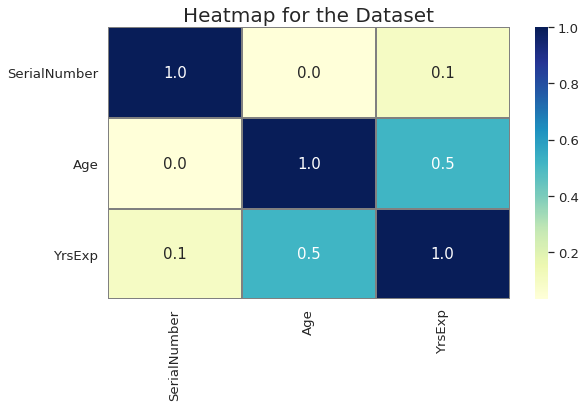

In [34]:
plt.rcParams['figure.figsize'] = (9, 5)
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.heatmap(dataset.corr(), annot = True, annot_kws={"size": 15}, fmt='.1f', cmap = 'YlGnBu', linewidths=1, linecolor='gray')
plt.title('Heatmap for the Dataset', fontsize = 20, fontweight=30)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

> **Only Age and YrsExp are correlated a bit with each other, The rest are completely uncorrelated.**

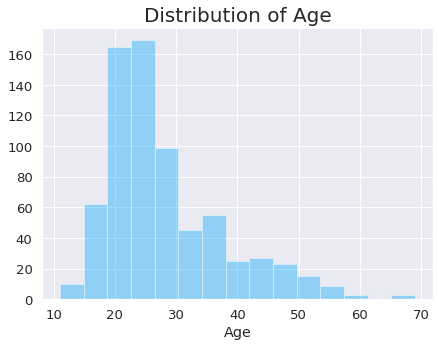

In [35]:
plt.figure(figsize=(7,5))
sns.distplot(dataset['Age'],kde=False,color="#09ABFF",bins=15)
plt.title('Distribution of Age', fontsize = 20, fontweight=30)
plt.show()

> **From the age distributions of migrants, It can be interpreted that most people who are migrating are in their 20s and 30s**

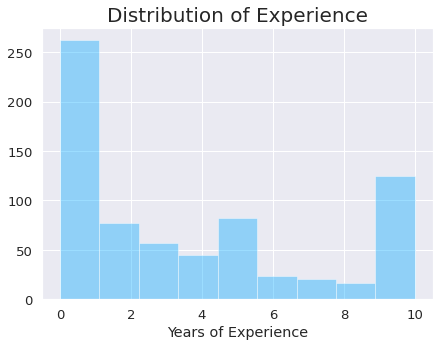

In [36]:
plt.figure(figsize=(7,5))
sns.distplot(dataset['YrsExp'],kde=False,color="#09ABFF")
plt.title('Distribution of Experience', fontsize = 20, fontweight=30)
plt.xlabel('Years of Experience')
plt.show()

Text(0.5, 0, 'Age')

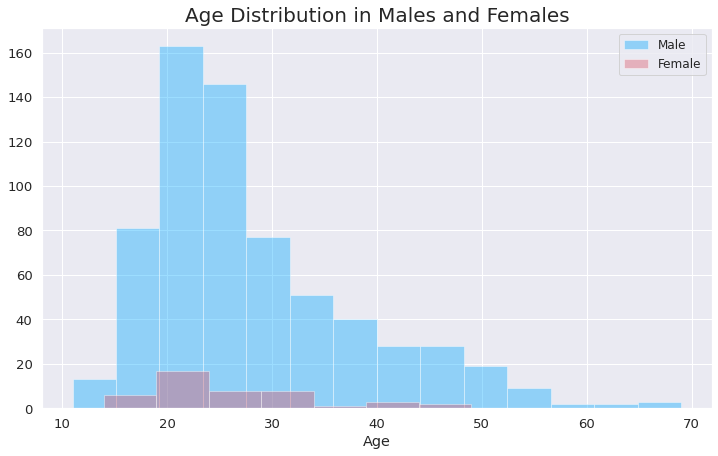

In [60]:
males = dataset[dataset.Sex == 'M']
sns.distplot(males['Age'], kde=False, label='Male',color='#09ABFF', bins=14)

females = dataset[dataset.Sex == 'F']
sns.distplot(females['Age'], kde=False, label='Female',color='#DB5A6B')

plt.legend(prop={'size': 12})
plt.title('Age Distribution in Males and Females', fontsize = 20, fontweight=30)
plt.xlabel('Age')

>**Given the very less proportion of females in our dataset, we should be cautious about generalizing from our analysis and models**

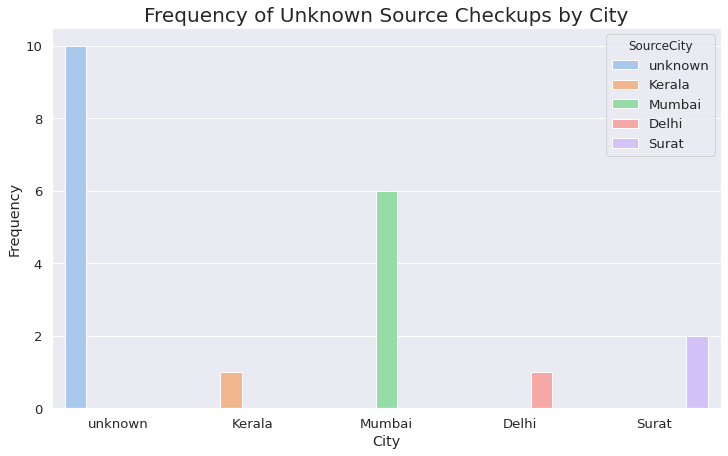

In [57]:
#Entries in dataset with Unknown SourceCheckup
notchecked = dataset[dataset['SourceCheckup']=='Unknown']

plt.rcParams['figure.figsize'] = (12, 7)
sns.countplot('SourceCity', hue='SourceCity', data=notchecked, palette='pastel', saturation=0.8) 
plt.title('Frequency of Unknown Source Checkups by City', fontsize = 20, fontweight=30)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

> **Mumbai, Delhi, Surat, Kerala & Other Unknown values have unknown values of
Checked at Source. Given the contagious nature of COVID-19, It's advisible to assume unknowns as not checked.**

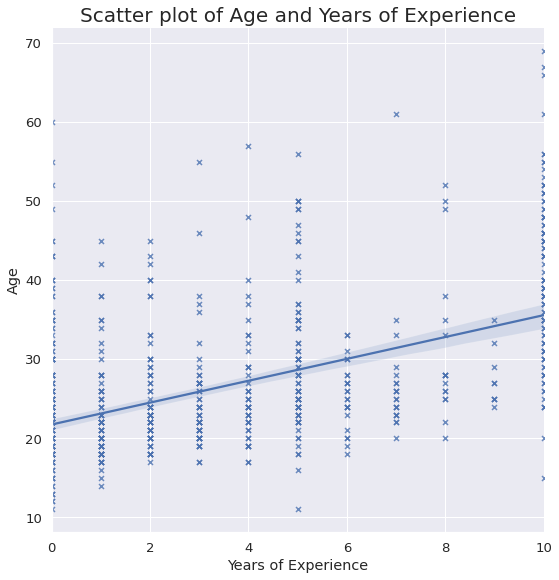

In [53]:
sns.lmplot('YrsExp', 'Age', data=dataset, fit_reg=True, 
            scatter_kws={"marker": "x","s": 25},
            palette="pastel", height=8, markers='x',robust=True)
plt.title('Scatter plot of Age and Years of Experience', fontsize = 20, fontweight=30)
plt.xlabel('Years of Experience')
plt.ylabel('Age')

plt.show()

> **The scatterplot shows a slight correlation (0.5) between Years of Experience and Age, which is intuitive. We have to be wary when fitting datasets to certain models when there is a high correlation between a few features causing overfitting**

### Note: Given that the test data dataset is only a small portion of the dataset. Analysis might be skewed as this is only a sample from the whole data.